In [118]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import pandas as pd
import time

In [119]:
df = pd.read_csv("Housing.csv")

In [120]:
print(df.head())

     price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
0  42000.0     5850         3        1        2      yes      no      yes   
1  38500.0     4000         2        1        1      yes      no       no   
2  49500.0     3060         3        1        1      yes      no       no   
3  60500.0     6650         3        1        2      yes     yes       no   
4  61000.0     6360         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
0    no    no         1       no  
1    no    no         0       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no  


In [121]:
Y = df['price'].values
Y = Y/1000
X = df[['lotsize','bedrooms']].values
print("before reshape:",X.shape)
X = X.reshape(len(X),2)
print("after reshape:",X.shape)
Y = Y.reshape(len(Y),1)

before reshape: (546, 2)
after reshape: (546, 2)


([], <a list of 0 Text yticklabel objects>)

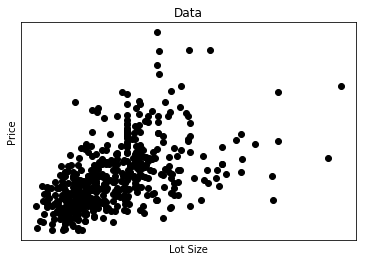

In [122]:
# Plot outputs
# print(X[:,0])
plt.scatter(X[:,0], Y,  color='black')
plt.title('Data')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

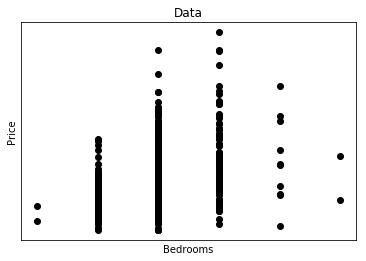

In [123]:
plt.scatter(X[:,1], Y,  color='black')
plt.title('Data')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())

In [124]:
def initialize_weights(n):
    #n features
    w = np.random.randn(n,1)*10**-5
    b = 0
    weights={}
    weights['w'], weights['b'] = w,b
    return weights

In [125]:
weights = initialize_weights(2)
weights

{'b': 0, 'w': array([[-6.60401700e-06],
        [-7.26079295e-06]])}

In [126]:
def predict(X,weights):
    #X input of shape (m , 1)
    #m = # of observations
    #n = 1 feature
    w = weights['w']
    b = weights['b']
#     assert w.shape == (2,1)
#     assert X.shape[1] == 2
    y = np.matmul(X,w)+b
    return y

In [127]:
def plot_result(X,Y,Y_pred,alpha=1):
    plt.figure(1)
    plt.scatter(X[:,0], Y,  color='black')
    plt.title('Data')
    plt.xlabel('Lot Size')
    plt.ylabel('Price')
    plt.xticks(())
    plt.yticks(())
    plt.plot(X[:,0], Y_pred, color='red',linewidth=3,alpha=alpha)
    
    #find average price predicted per bedroom
    x_data = X[:,1]
    x_data = x_data.reshape(len(x_data),1)
    data = np.concatenate((x_data,Y),axis=1)
    df = pd.DataFrame(data=data, columns=['bedrooms','price'])
    bedrooms = df.groupby(['bedrooms']).mean().index.values
    price = df.groupby(['bedrooms']).mean().values
    
    plt.figure(2)
    plt.scatter(X[:,1], Y,  color='black')
    plt.title('Data')
    plt.xlabel('bedrooms')
    plt.ylabel('Price')
    plt.xticks(())
    plt.yticks(())
    plt.plot(bedrooms, price, color='red',alpha=1)    

In [128]:
def loss_function(Y_pred,Y):
    loss = np.mean((Y_pred-Y)**2)
    return loss

In [129]:
def backprop(X,Y,Y_pred,weights,alpha=1*10**(-8)):
    n = X.shape[1]
    #X.shape = (m,2) feature data
    #Y.shape = (m,1) true labels
    #Y_pred.shape = (m,1) predicted labels
    #weights[w].shape =  (2,1)
    #weights[b].shape = (1,)
    w = weights['w']
    b = weights['b']
#     assert X.shape[1] == 2
#     assert (Y_pred-Y).shape[1] == 1
    dw = np.mean(2*X*(Y_pred-Y),axis=0).transpose()
    db = np.mean(2*(Y_pred-Y),axis=0)
    dw = dw.reshape(n,1)
#     assert dw.shape == (2,1)
    w = w-dw*alpha
    b = b-db*alpha
    weights['w'],weights['b'] = w,b
    return weights
    

epoch : 0 ;loss = 5348.0 ;mean error: $ 73.0 K
epoch : 1 ;loss = 1341.0 ;mean error: $ 37.0 K
epoch : 2 ;loss = 775.0 ;mean error: $ 28.0 K
epoch : 3 ;loss = 696.0 ;mean error: $ 26.0 K
epoch : 4 ;loss = 684.0 ;mean error: $ 26.0 K
epoch : 5 ;loss = 683.0 ;mean error: $ 26.0 K
epoch : 6 ;loss = 683.0 ;mean error: $ 26.0 K
epoch : 7 ;loss = 683.0 ;mean error: $ 26.0 K
epoch : 8 ;loss = 683.0 ;mean error: $ 26.0 K
epoch : 9 ;loss = 683.0 ;mean error: $ 26.0 K


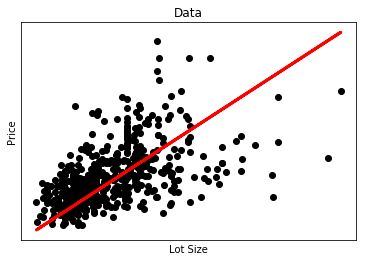

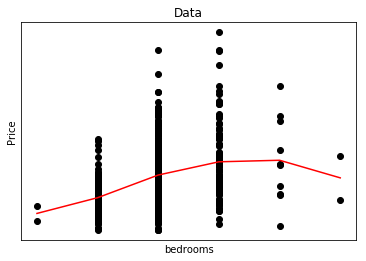

In [130]:
epochs = 10
losses = []
features = 2
if features ==1:
    X = X[:,0]
    X= X.reshape(len(X),1)
weights = initialize_weights(features)
for i in range(epochs):
    Y_pred = predict(X,weights)
#     plot_result(X,Y,Y_pred,i+1/5)
    loss = loss_function(Y_pred,Y)
    weights = backprop(X,Y,Y_pred,weights)
    print("epoch :",i,";loss =",round(loss,0),";mean error: $",str(round(np.sqrt(loss),0)),"K")
    losses.append(loss)
    time.sleep(.1)
plot_result(X,Y,Y_pred)

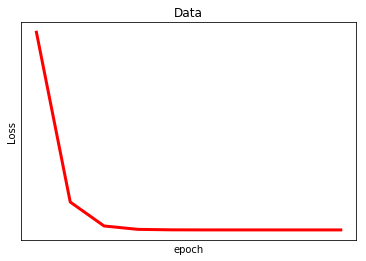

In [46]:
plt.title('Data')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.xticks(())
plt.yticks(())
plt.plot(range(len(losses)), losses, color='red',linewidth=3)

In [131]:
loss = np.mean(np.abs(Y_pred-Y))
print(loss)

19.362625382007383
